In [3]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
from tensorflow.keras.models import Model #model summary 에서 layer 를 다쓰는게 아니라 layer 를 자르고 하는것

tf.keras.models.load_model(path)  --> path 경로 에 있는 model 가져오기 

In [4]:
model_1 = tf.keras.models.load_model('/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers_model_1.h5')

Image.open(path) path 경로에있는 이미지 가져오기 

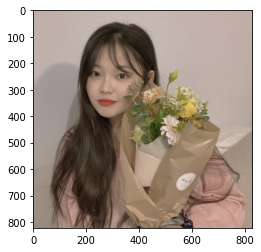

In [6]:
image = Image.open('/content/예측 1.jpg')
plt.imshow(image)

In [8]:
model_1.summary() #전체 모델을 다 사용 해도 되지만 잘라서 사용할수 있다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 56448)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [10]:
ins = model_1.inputs #model_1 의 input 값 
outs = model_1.layers[0].output
feature_map = Model(inputs = ins,outputs = outs)
feature_map.summary()
'''
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0     -> ins     
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896   -> outs
'''

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [12]:
#img resize 해줘야 한다 
img_resize = image.resize([100,100]) #근데 만약 사진이 1차원 데이터라면?? -> 그러면 모델을 바꿔야 되나 ??
input_img = np.expand_dims(img_resize , axis = 0) #차원수 증가 numpy expands dimsions
print(input_img.shape)

(1, 100, 100, 3)


In [15]:
pred_img = feature_map.predict(input_img)

In [16]:
pred_img.shape

(1, 98, 98, 32)

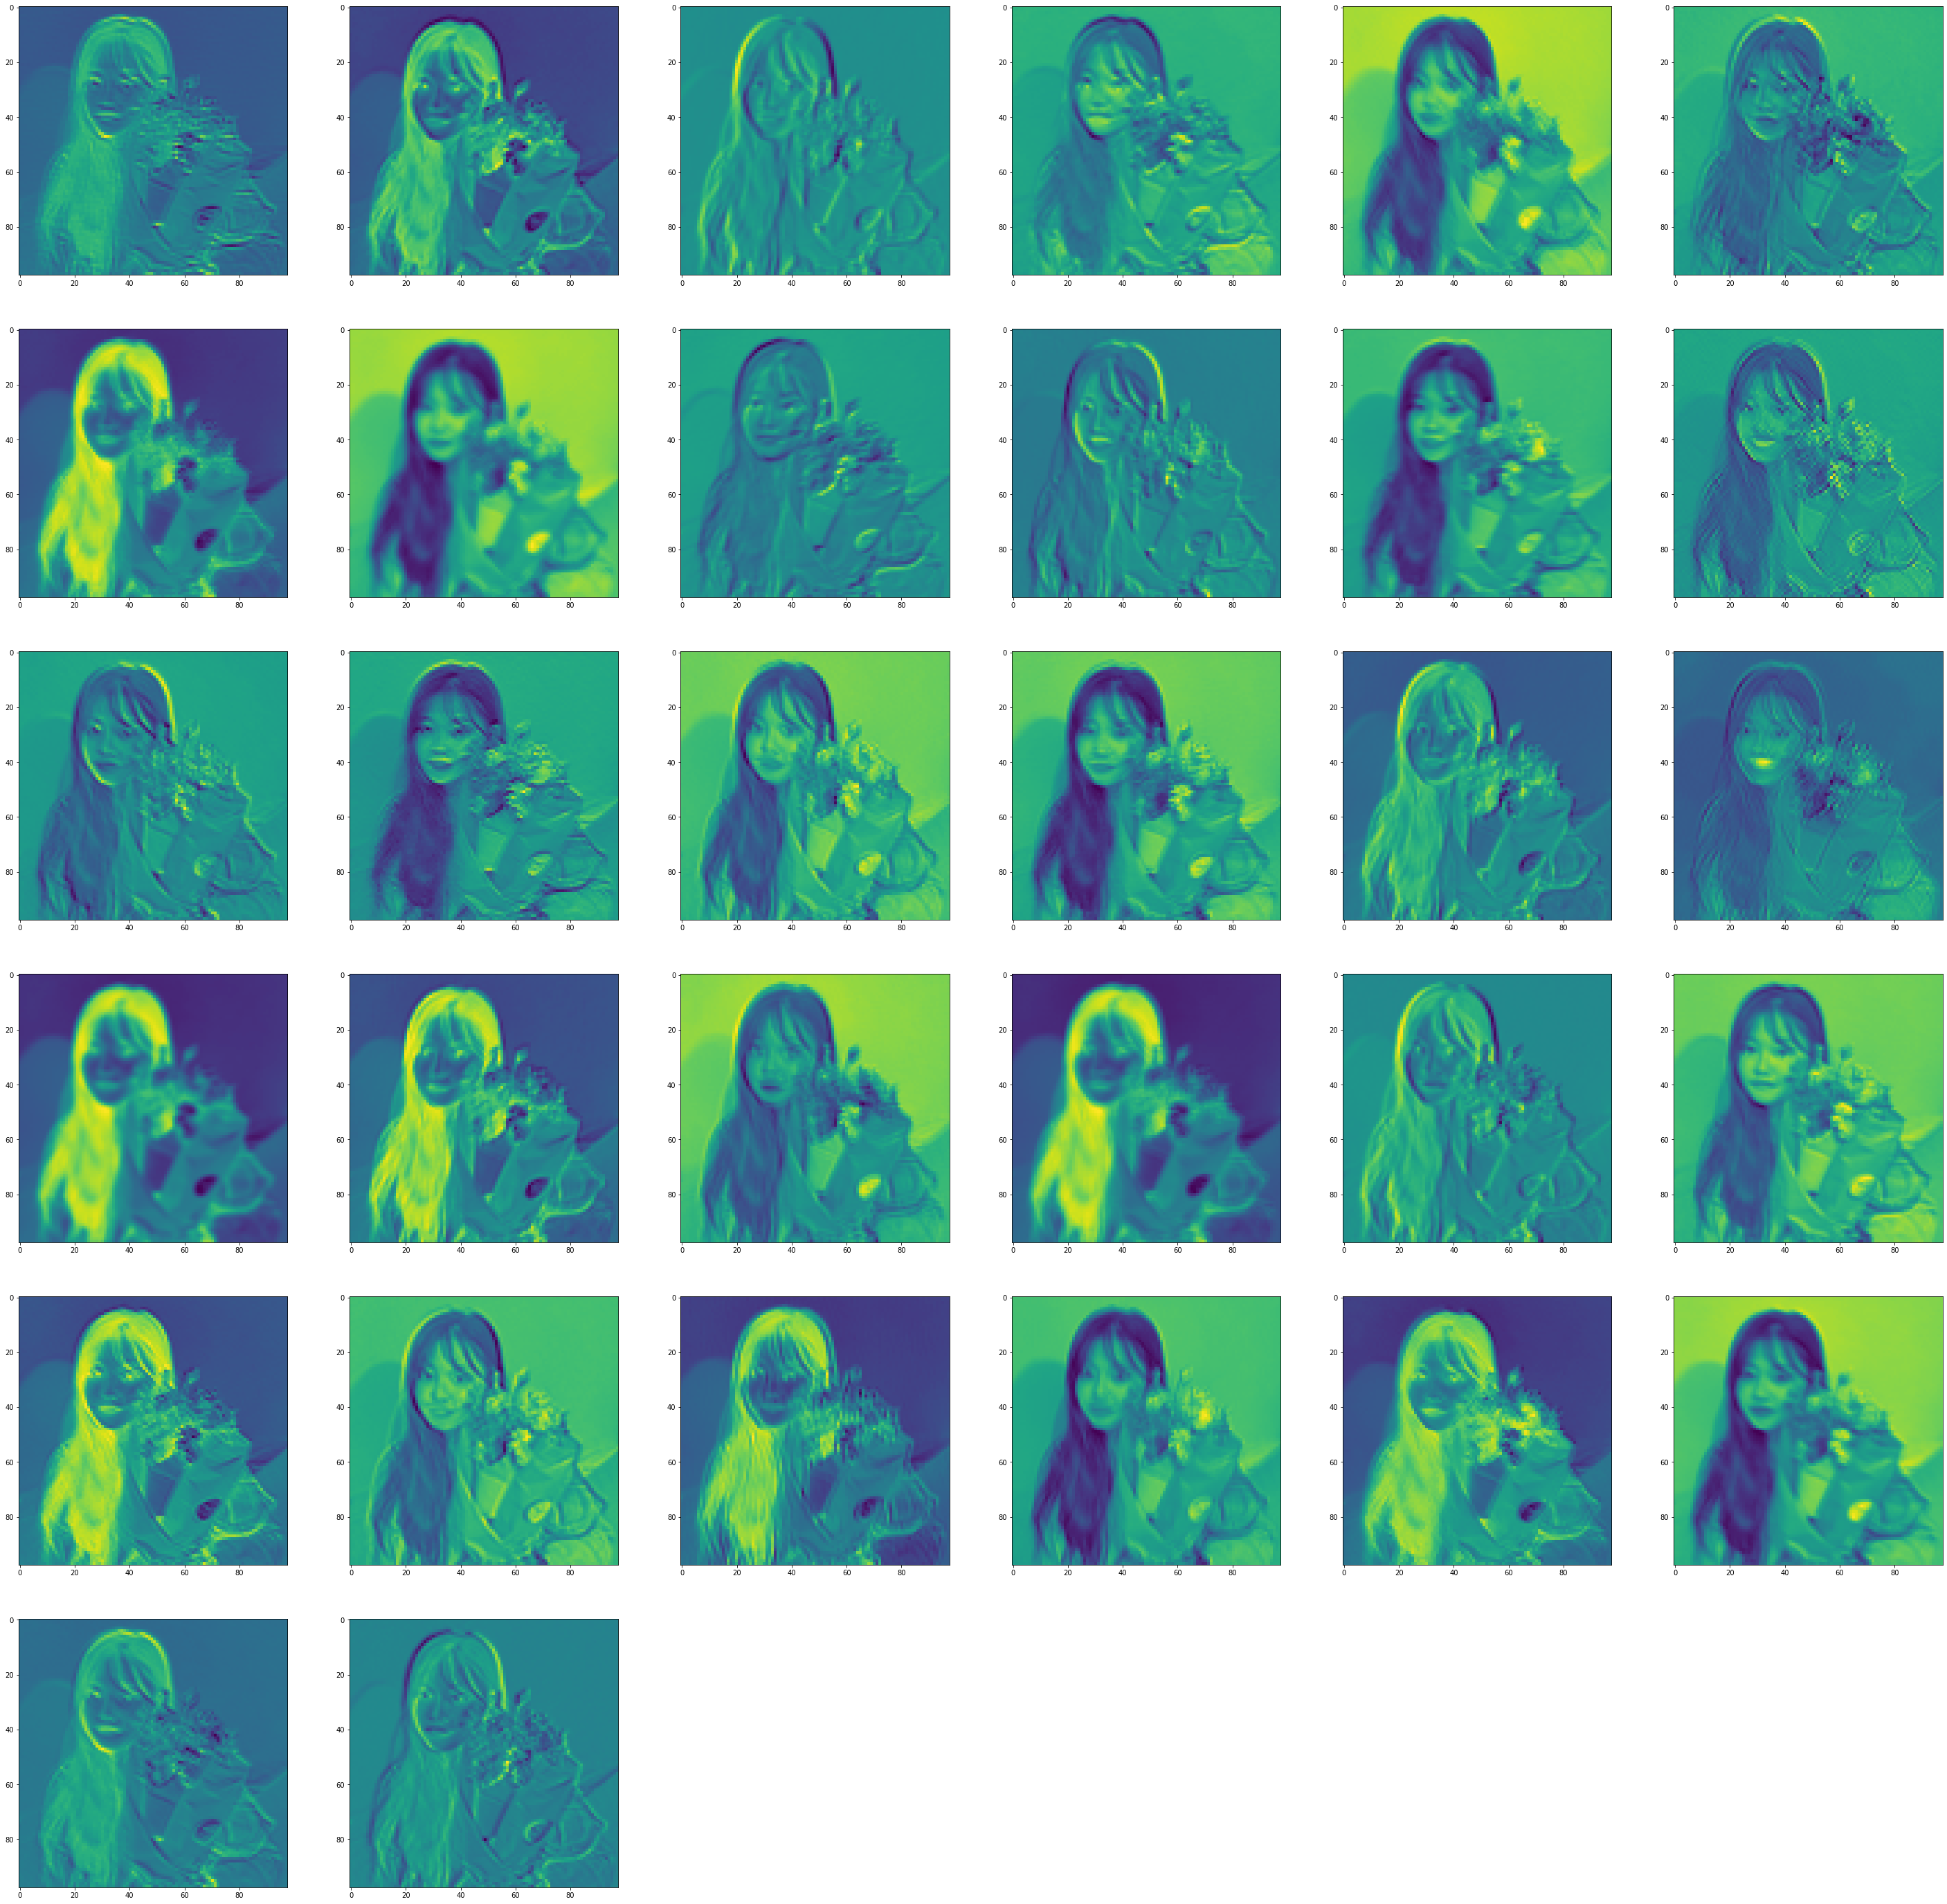

In [18]:
fig = plt.figure(figsize = (50,50))

for i in range(32):
  ax = fig.add_subplot(6,6,i+1)
  ax.imshow(pred_img[0,:,:,i])

In [19]:
#합성곱 신경망에 

ins =model_1.inputs 
outs = model_1.layers[1].output

feature_map = Model(inputs = ins,outputs = outs)
feature_map.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [20]:
pred_img = feature_map.predict(input_img)

In [21]:
pred_img.shape

(1, 49, 49, 32)

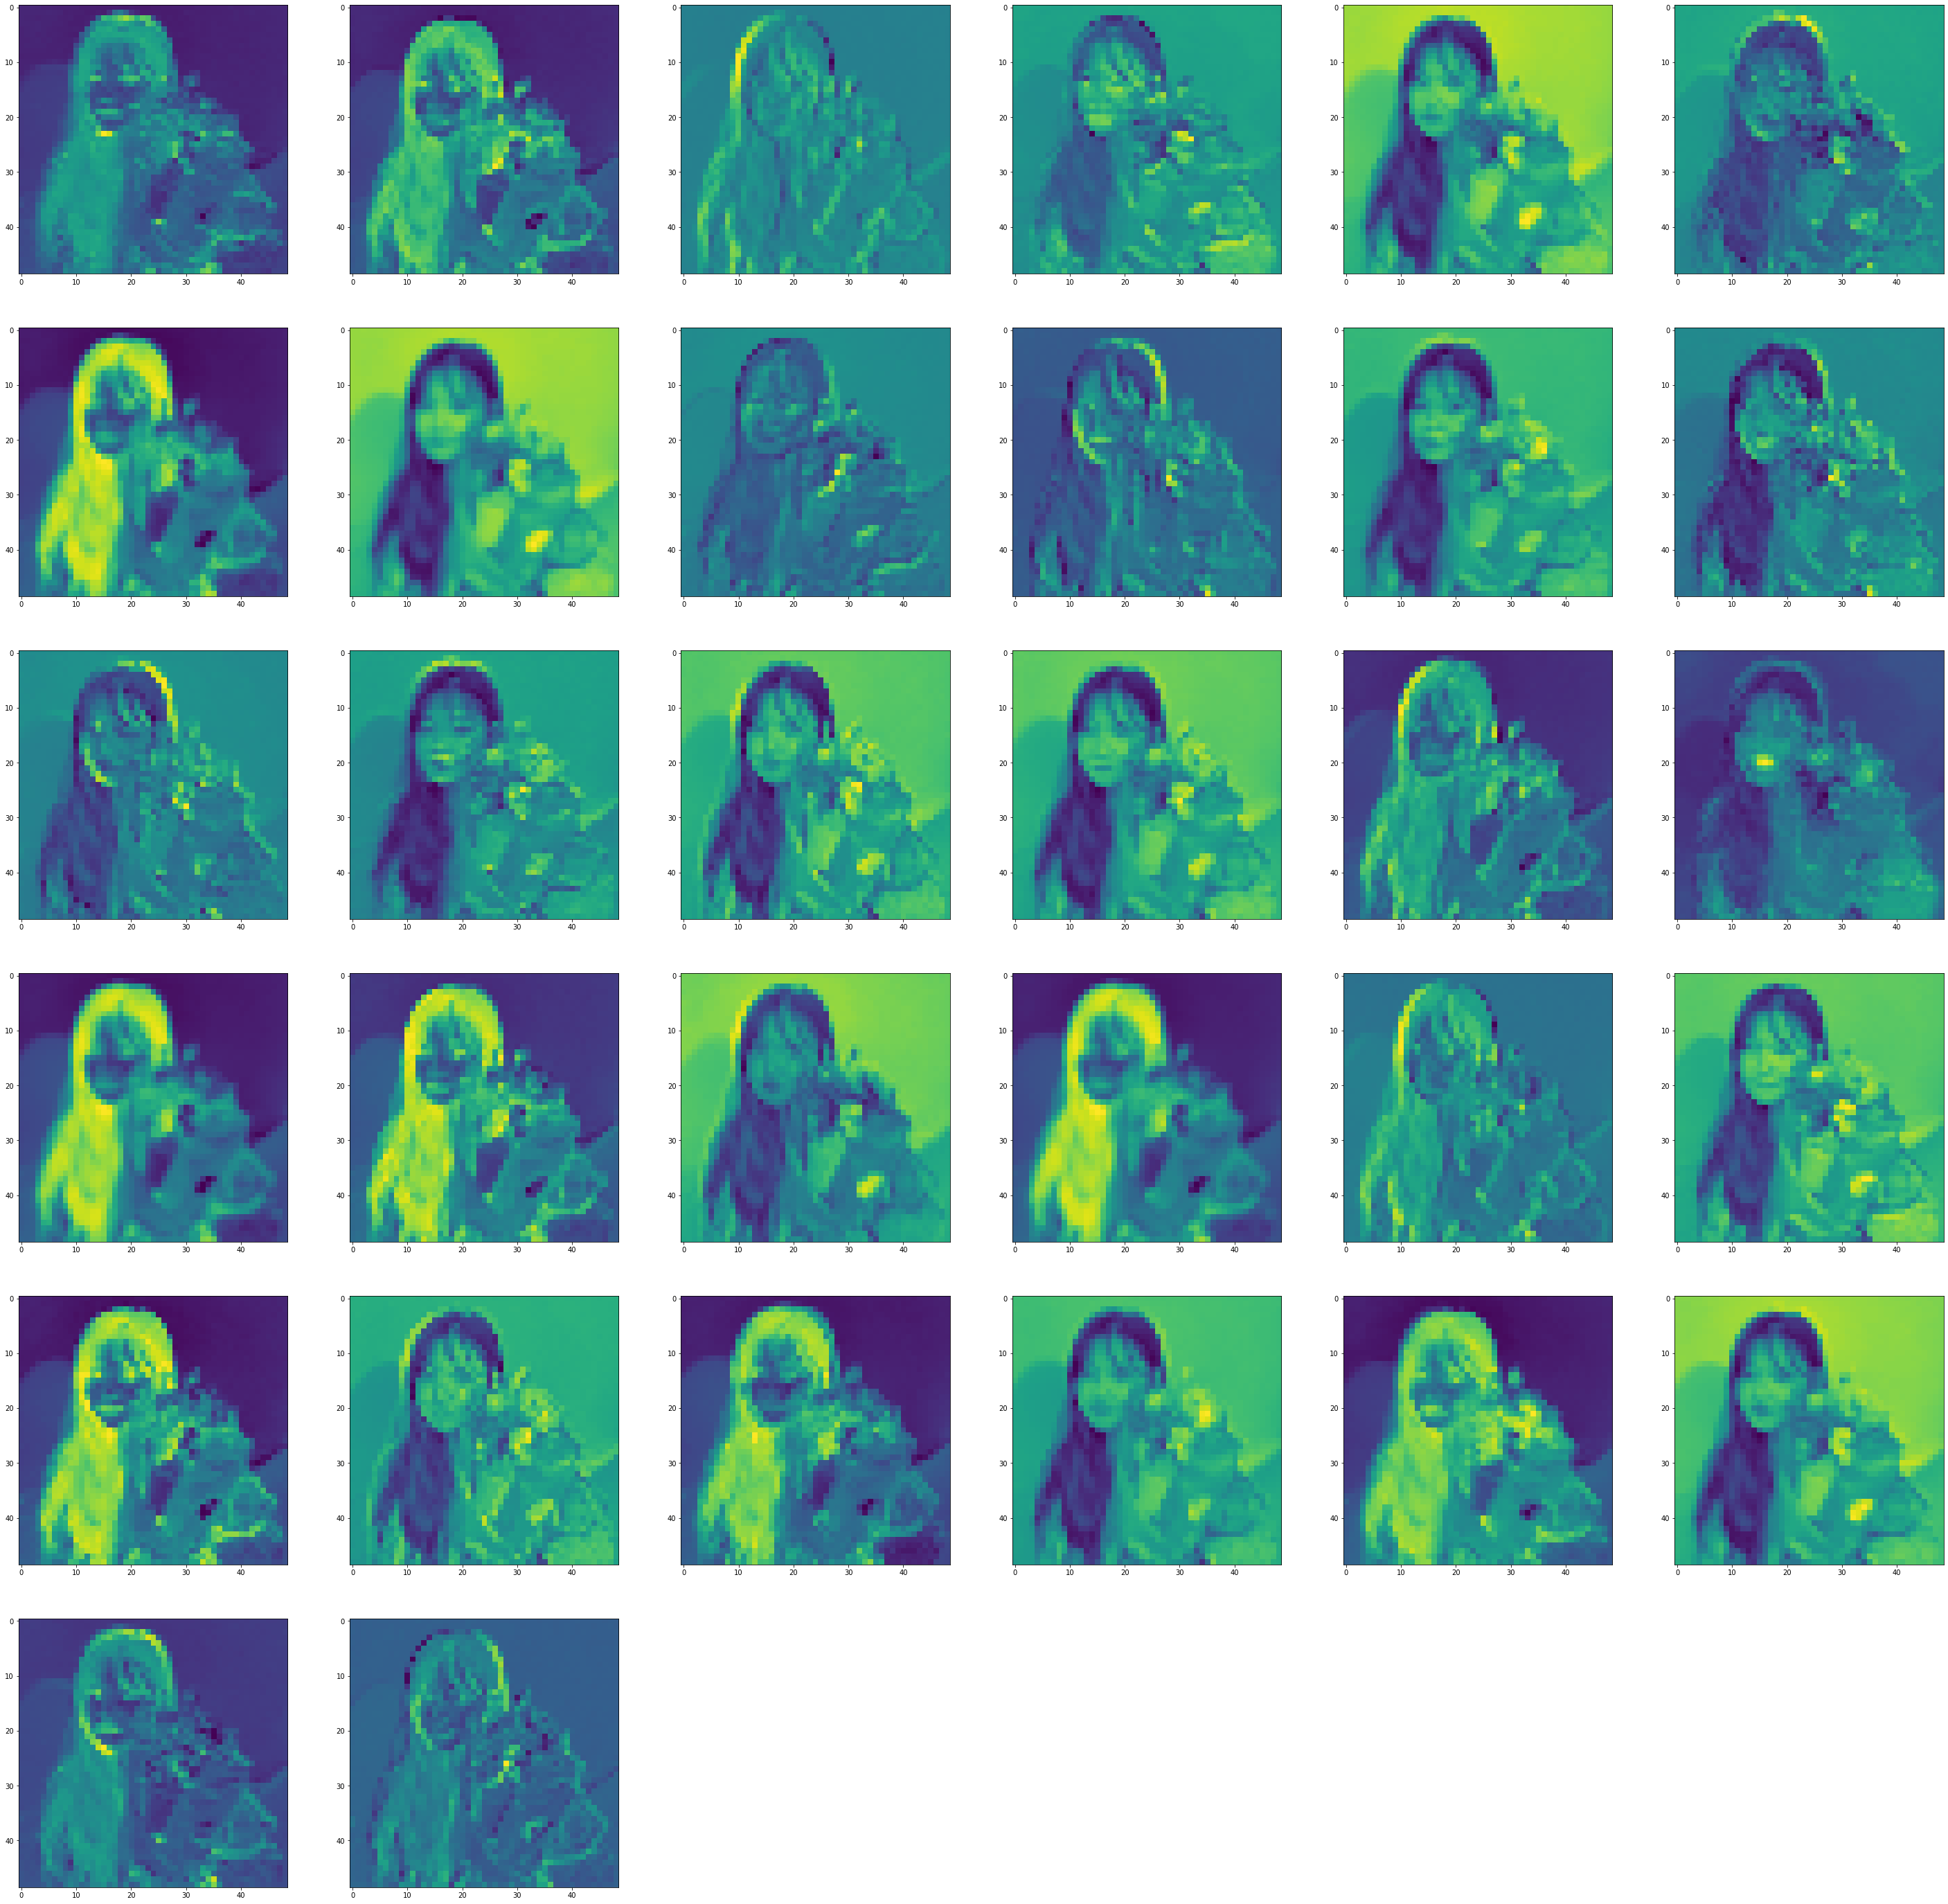

In [24]:
#max pooling 을 통과 했을떄 
fig = plt.figure(figsize = (50,50))

for i in range(32):
  ax = fig.add_subplot(6,6,i+1)
  ax.imshow(pred_img[0,:,:,i])

In [30]:
ins = model_1.inputs
outs = model_1.layers[4].output

feature_map = Model(inputs = ins , outputs = outs)
feature_map.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_______________________________________________________

In [31]:
pred_img = feature_map.predict(input_img)
pred_img.shape

(1, 21, 21, 128)

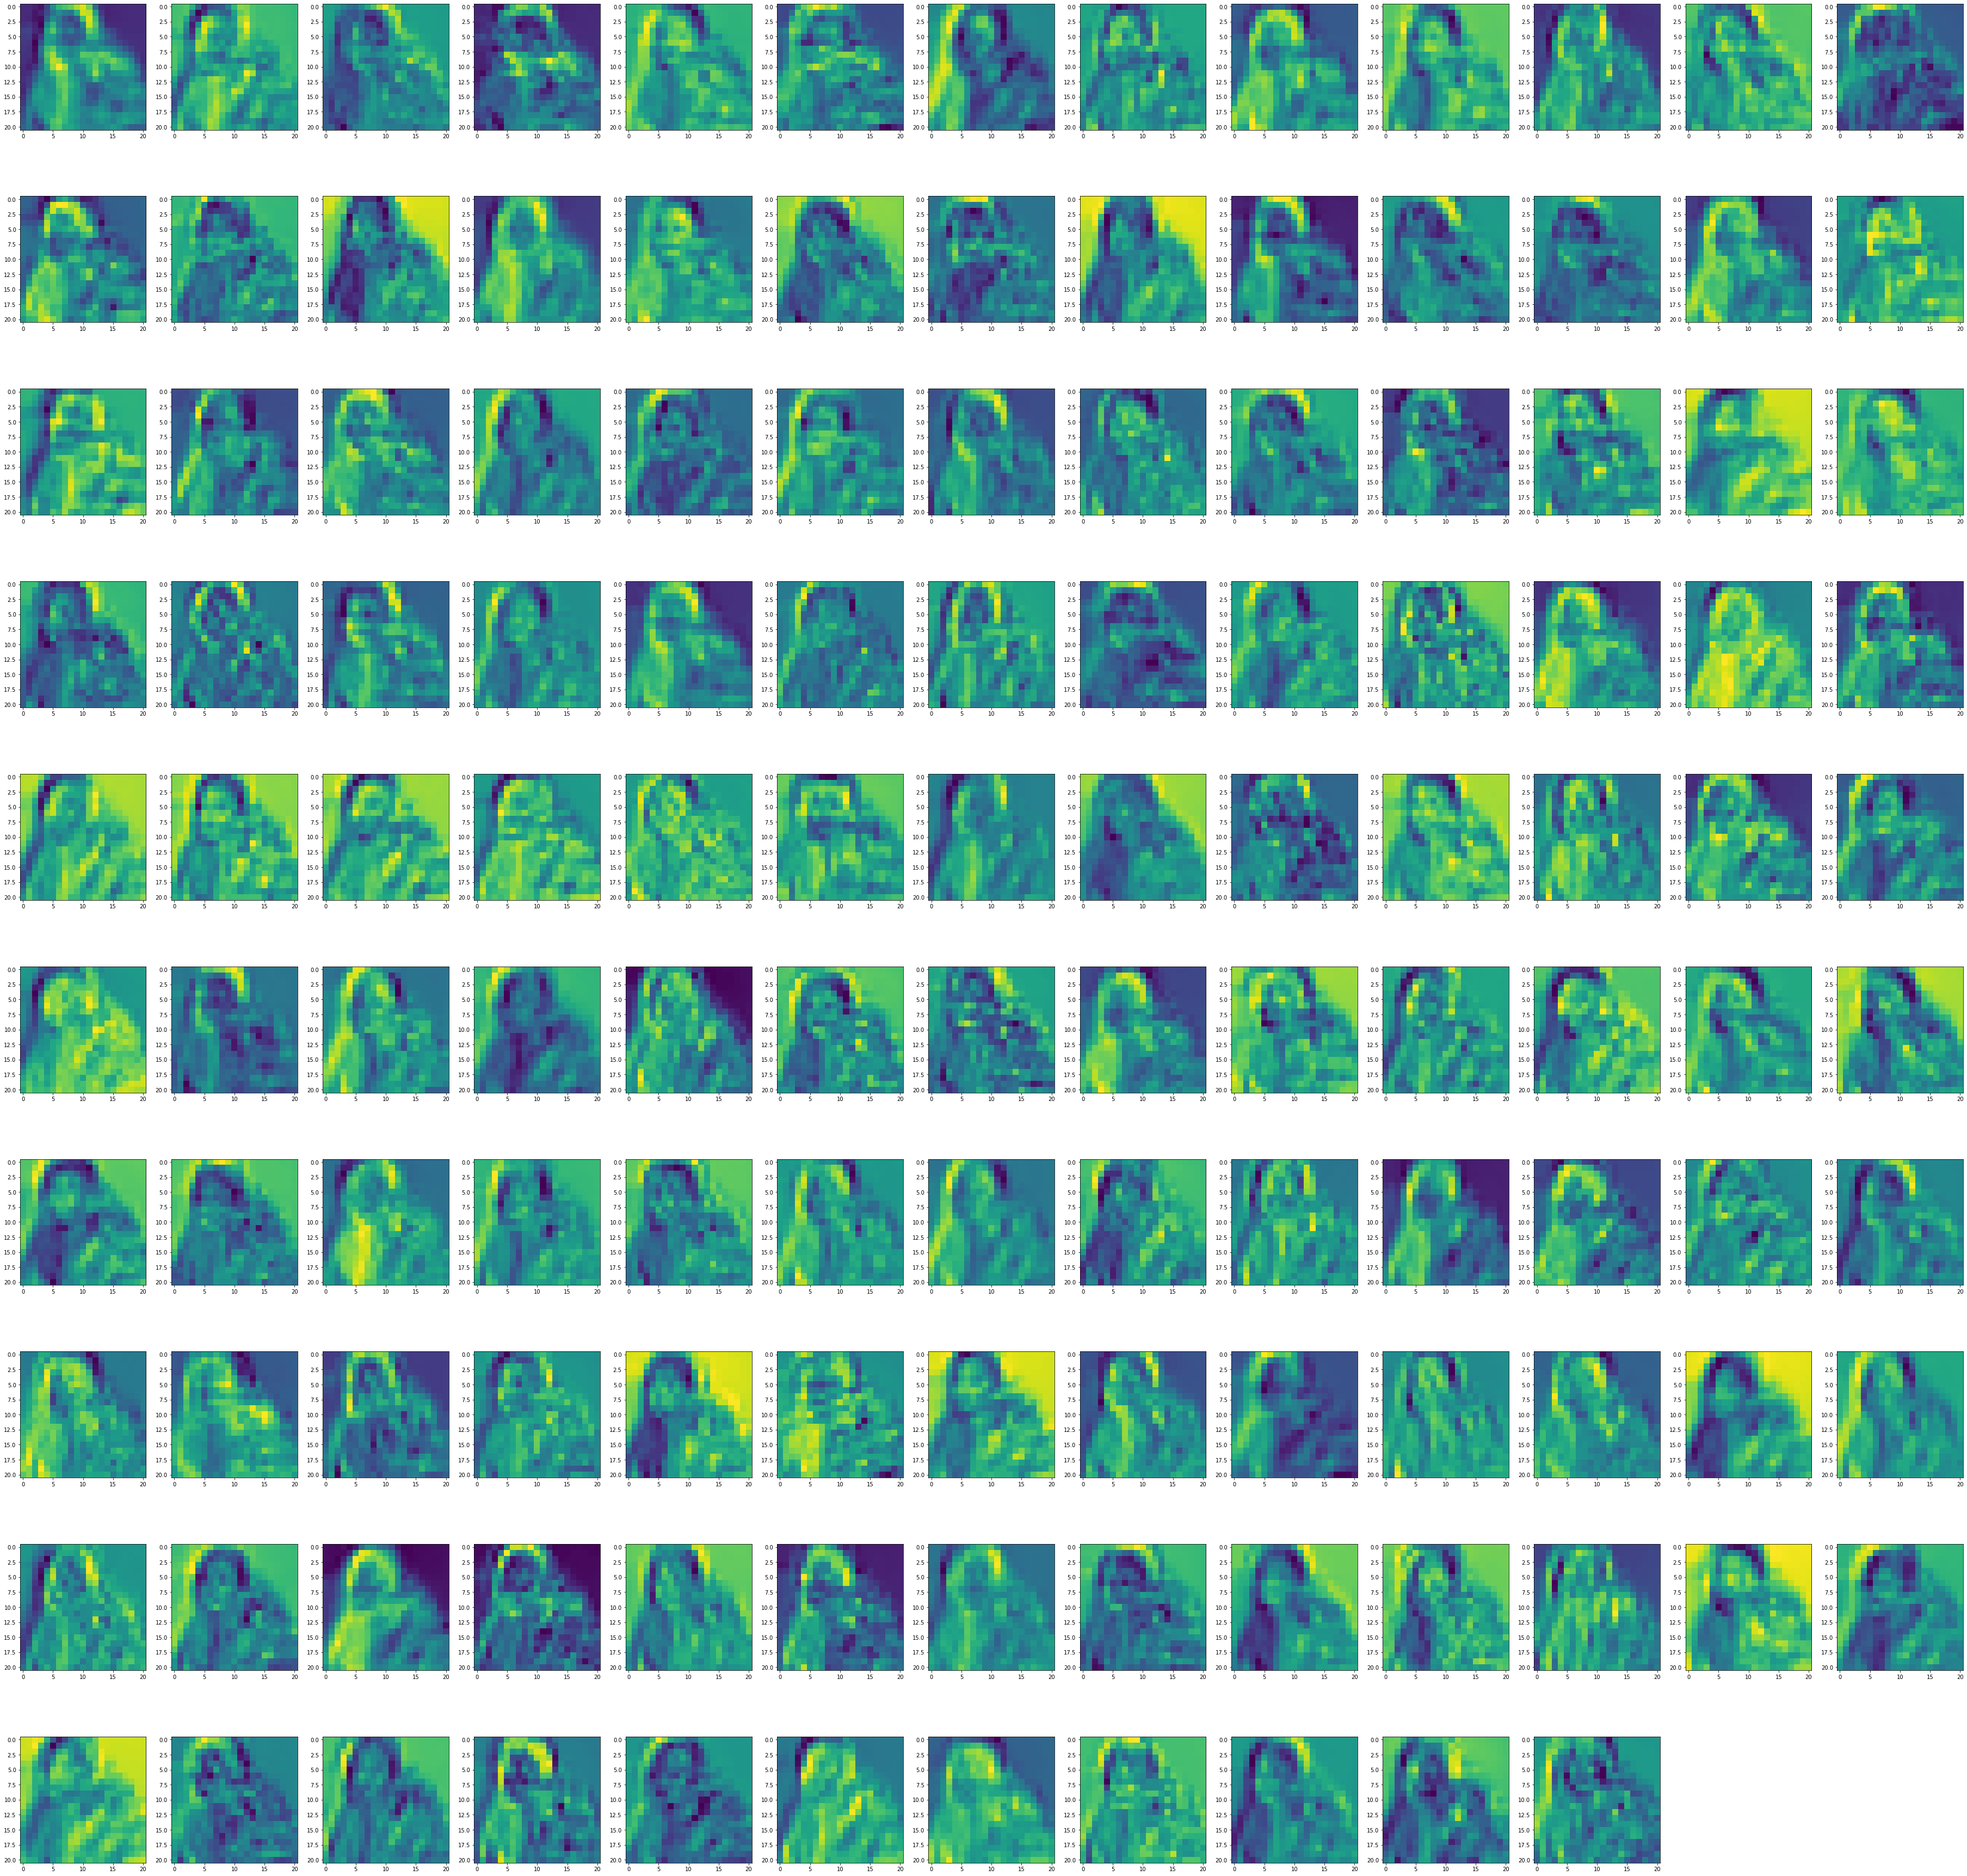

In [35]:
fig = plt.figure(figsize = (64,64)) #128개의 img 가 필요해서 64x64 크기로 만든다. 
for i in range(128):
  ax = fig.add_subplot(10,13,i+1) #130개의 subplot 을 만든다
  ax.imshow(pred_img[0,:,:,i]) #하나의 subplot 에 하나의 이미지를 보여준다